__DISCLARIMER__

The idea of this notebooks is not to explain the same that is in the Bishop. The idea is just to be a guide to follow the examples with information.

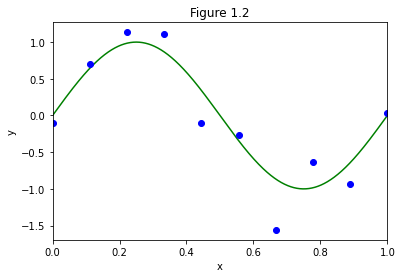

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# 1000 linearly spaced numbers
x = np.linspace(0,1,1000)

# the function, which is y = sin(2*pi*x) here
y = np.sin(np.pi*2*x)

# setting the axes at the centre
M=10
N = 10
# plot the function
plt.plot(x,y, 'g')
plt.xlim(0,1)
#Create and Plot observations
obs_x = np.linspace(0,1,N)
obs_y = np.sin(np.pi*2*obs_x)
obs_y = np.random.normal(0,0.3,N) + obs_y
plt.plot(obs_x,obs_y,'bo')

# show the plot
plt.title("Figure 1.2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now we will try to find a curve to fit our f(x)=sen($\pi$*2*x).

Suppose that we have a data set that comprises 10 observations, call it __x__ and the corresponding target values __t__. We can fit our data to the curve using the following formula:

$y(x,$__w__$)=w_0+w_1x+w_2x^{2}+...+w_Mx^{M}=\sum_{j=0}^{M} w_jx^{j}$

And we have the following error formula:
$E($__w__$)=\frac{1}{2}\sum_{i=1}^{N} (y(x_n,$__w__$)-t_n)^2$

Because the error function is a quadratic function of the coefficients w, its derivatives with respect to the coefficients will be linear in the elements of w, and so the minimization of the error function has a unique solution, denoted by __w__  , which can be found in closed form. The resulting polynomial is given by the function y(x, __w*__).   
We cam re-write our problem as a matrix problem:  
$Ax=b$  
And we can solve it using normal equations:  
$x=(A^{t}A)^{-1}A^{t}b$


I will show the different results for different degrees. 0 to 9 and 10 observations. 

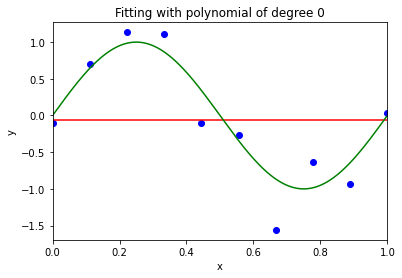

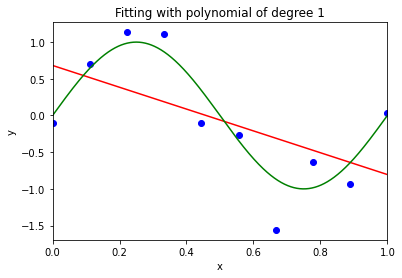

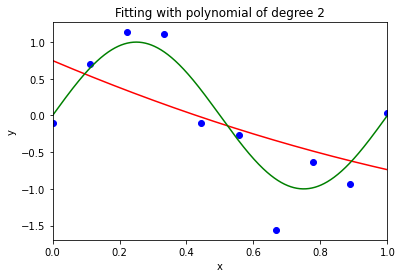

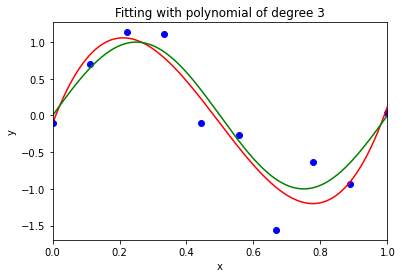

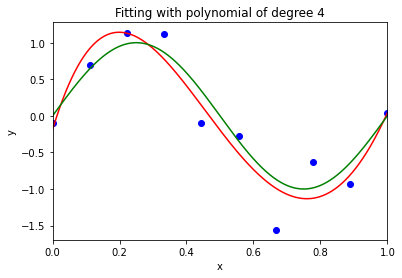

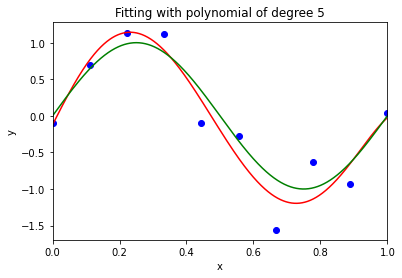

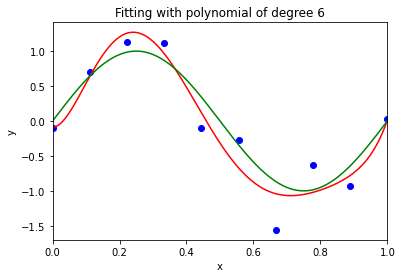

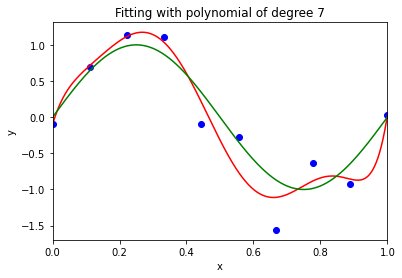

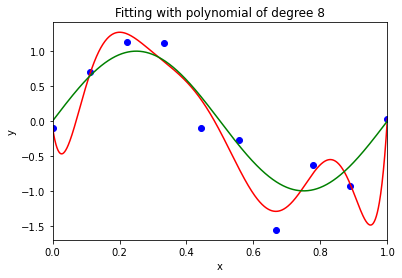

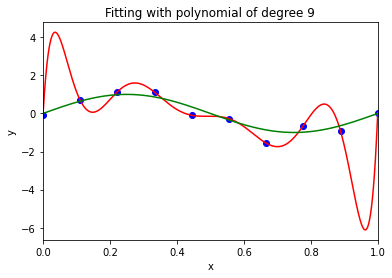

In [237]:
def pol_matrix(x,m):
    A = np.zeros(shape=(N,m+1))
    for i in range(0,N):
        for j in range(0,m+1):
            A[i][j]= x[i]**j
    return A
def plot_pol(x,coeff,m):
    res = []
    for i in range(len(x)):
        val = 0
        for j in range(0,m+1):
            val+=(x[i]**j)*coeff[j]
        res.append(val)
    return res   
coef_dic  = {}

for m in range(0,M):
    b=obs_y
    A = pol_matrix(obs_x,m)
    At=np.transpose(A)
    AtA = np.dot(At,A)
    AtA_inv = np.linalg.inv(AtA)
    coeff_fit = np.dot(np.dot(AtA_inv,At),b)
    coef_dic[m]=coeff_fit
    x_fit = np.linspace(0,1,1000)
    y_fit = plot_pol(x_fit,coeff_fit,m)
    plt.plot(obs_x,obs_y,'bo')
    plt.plot(x_fit,y_fit, 'r')
    plt.plot(x,y, 'g')
    plt.xlim(0,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Fitting with polynomial of degree "+str(m))
    plt.show()


As you can see, as the degree increase, the curve becomes very accurate and this is not what we want, we want a model that generalize well. This problem is called overfitting. We can measure the error with the root-mean-square.  
$E_{RMS}=\sqrt{(\frac{2E(w*)}{N})}$

We will use de root-mean-square to measure the error of the different degrees.  You will see that when the curve start overfitting the error goes to 0.

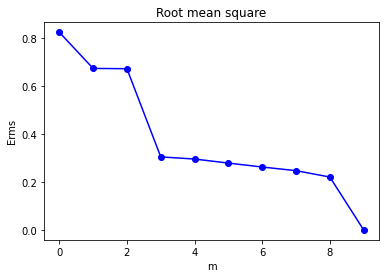

In [247]:
def rms(y,y_fit):
    res = 0
    for i in range(0,len(y)):
        res+=(y_fit[i]-y[i])**2

        
    return (res/N)**(0.5)    
errors = []
for m in range(0,M):  
    errors.append(rms(obs_y,plot_pol(obs_x,coef_dic[m],m)))
plt.plot(errors,'bo-')  
plt.title("Root mean square")
plt.ylabel("Erms")
plt.xlabel("m")
plt.show()
    

Now, we will measure our curve generating new data. We will use our first dataset as a training one, and the new as a testing one. You will see that when the training set starts to overfit, the test set will have an important error. As I said before, this is because it starts to be bad generalizing.  


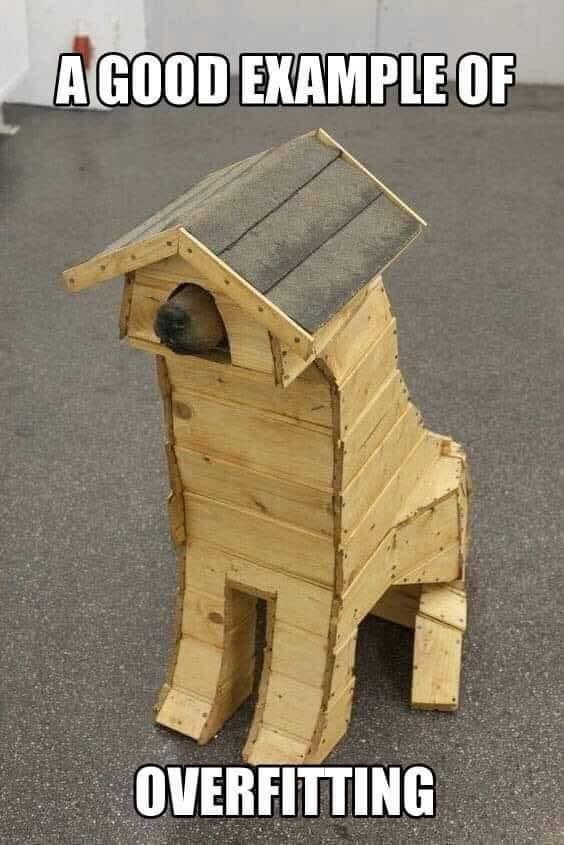

A picture is worth a thousand words

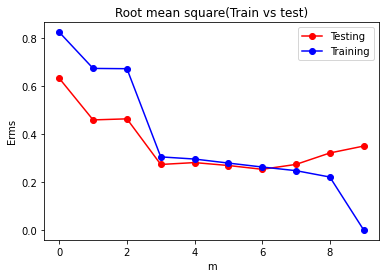

In [239]:
obs_x_test = np.linspace(0,1,N)
obs_y_test = np.sin(np.pi*2*obs_x_test)
obs_y_test = np.random.normal(0,0.3,N) + obs_y_test
errors_test = []

for m in range(0,M):
   
    errors_test.append(rms(obs_y_test,plot_pol(obs_x_test,coef_dic[m],m)))
    #plt.plot(obs_x_test,obs_y_test,'bo')
    #plt.show()
plt.plot(errors_test,'ro-',label="Testing") 
plt.plot(errors,'bo-',label="Training") 
plt.title("Root mean square(Train vs test)")
plt.ylabel("Erms")
plt.xlabel("m")
plt.legend()
plt.show()
    

One technique that is often
used to control the over-fitting phenomenon in such cases is that of regularization,
which involves adding a penalty term to the error function  in order to discourage
the coefficients from reaching large values. The simplest such penalty term takes the
form of a sum of squares of all of the coefficients, leading to a modified error function
of the form:  
$E($__w__$)=\frac{1}{2}\sum_{i=1}^{N} (y(x_n,$__w__$)-t_n)^2+\frac{\lambda}{2}||$__w__$||^{2}$


An the close formula using matrix notation is:

$x=(\lambda I+A^{t}A)^{-1}A^{t}b$


You will see that if we fix the degree m=9, we can vary the $\lambda$. When we use very very small regularization terms we overfit, but as we increase it, we get better results.

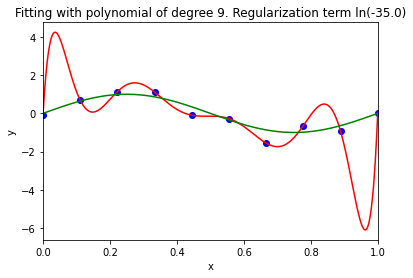

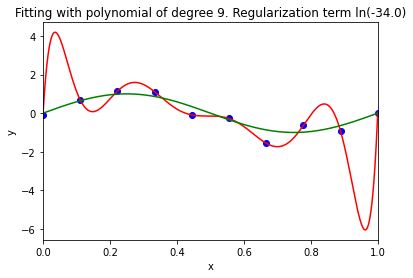

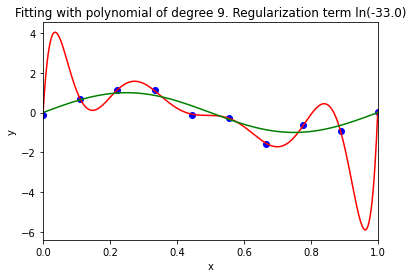

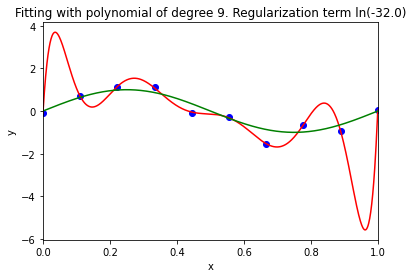

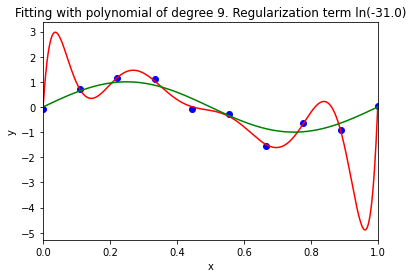

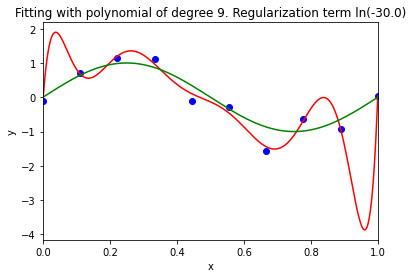

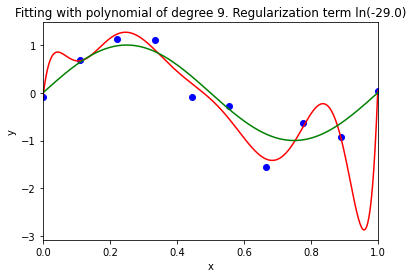

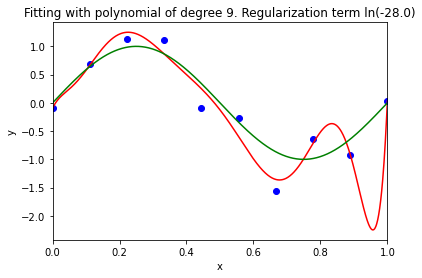

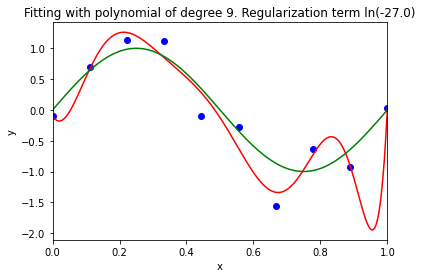

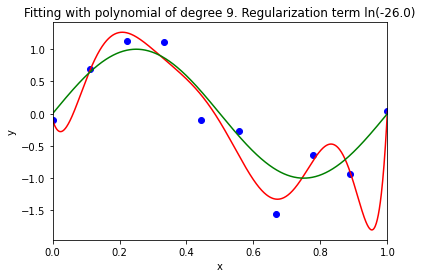

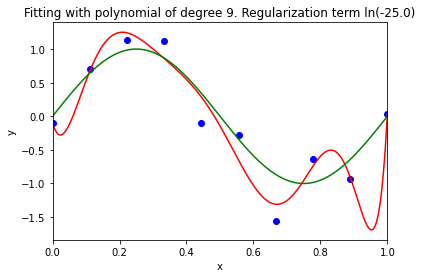

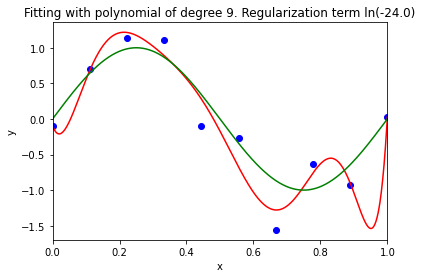

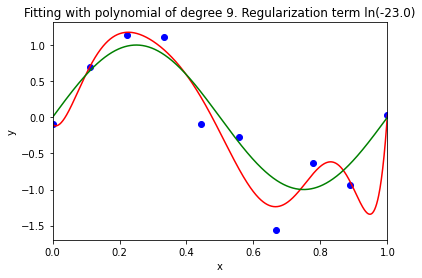

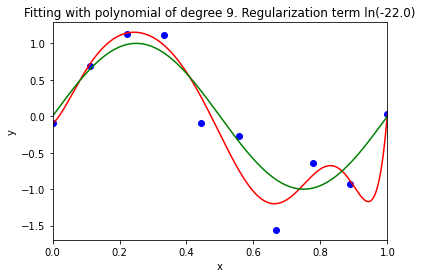

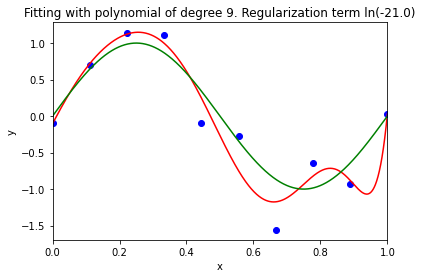

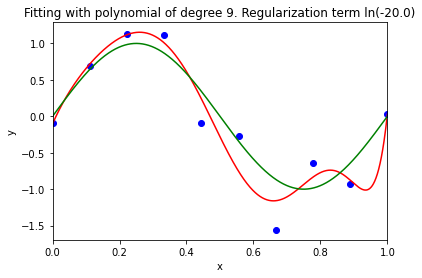

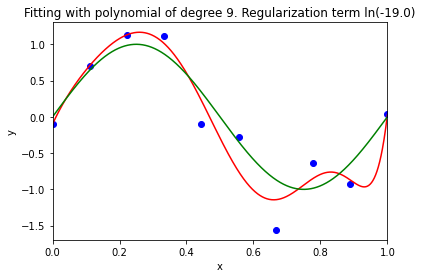

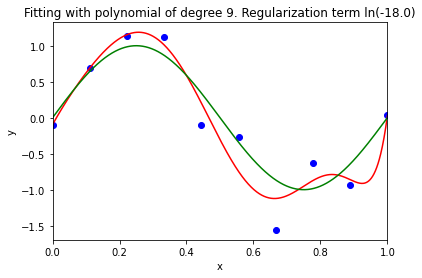

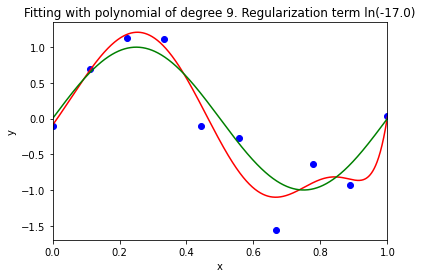

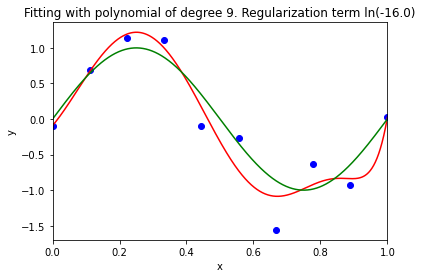

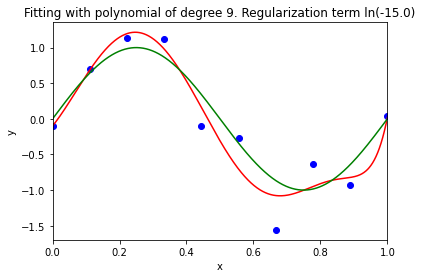

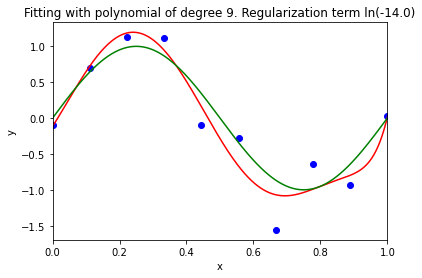

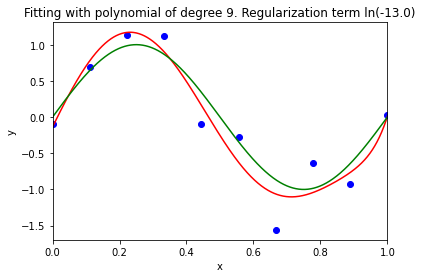

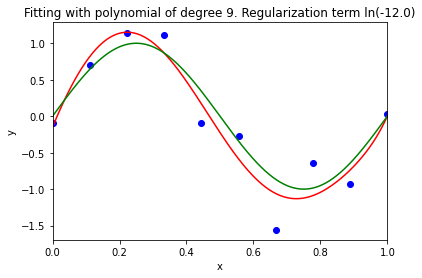

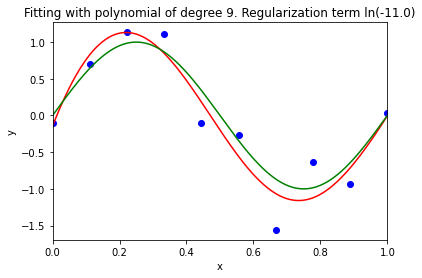

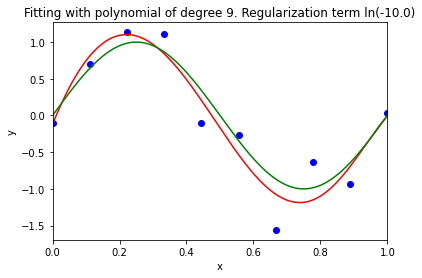

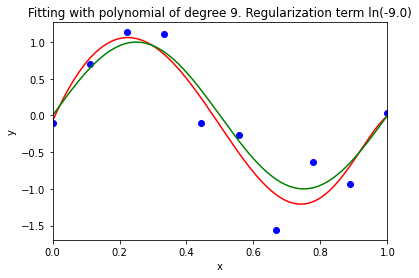

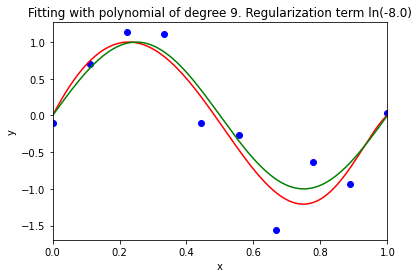

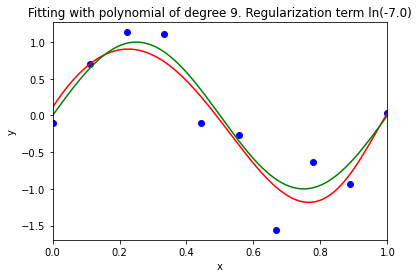

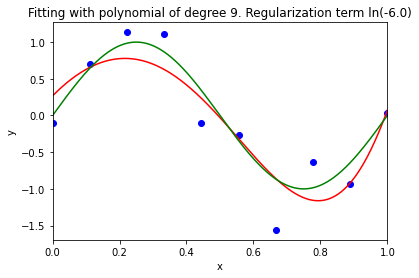

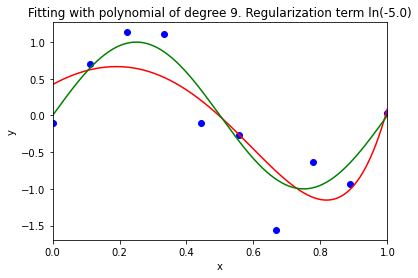

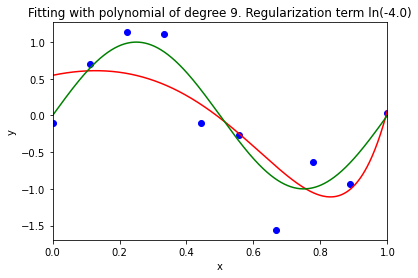

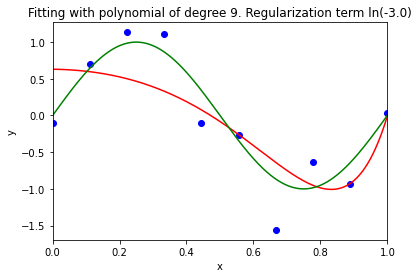

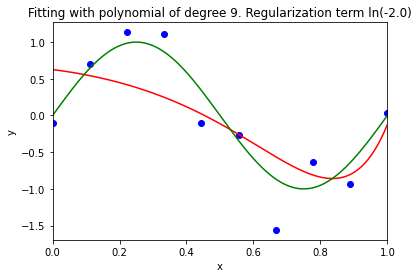

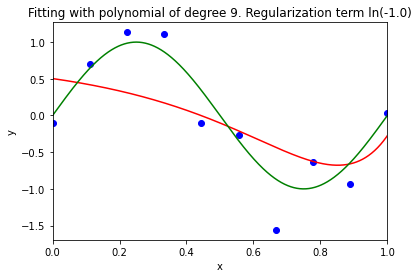

In [289]:
coef_dic_regularized  = {}
reg = []
values = []
for i in range(0,35):
    reg.append(np.exp(-35+i))
    values.append(-35+i)
for l in reg:
    m=9
    b=obs_y
    A = pol_matrix(obs_x,m)
    At=np.transpose(A)
    AtA = np.dot(At,A)
    AtA_inv = np.linalg.inv(np.identity(AtA.shape[0])*l+AtA)
    coeff_fit = np.dot(np.dot(AtA_inv,At),b)
    coef_dic_regularized[l]=coeff_fit
    x_fit_regularized = np.linspace(0,1,1000)
    y_fit_regularized = plot_pol(x_fit_regularized,coeff_fit,m)
    
    plt.plot(obs_x,obs_y,'bo')
    plt.plot(x_fit_regularized,y_fit_regularized, 'r')
    plt.plot(x,y, 'g')
    plt.xlim(0,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Fitting with polynomial of degree 9. Regularization term ln(" +str(np.log(l))+")")
    plt.show()

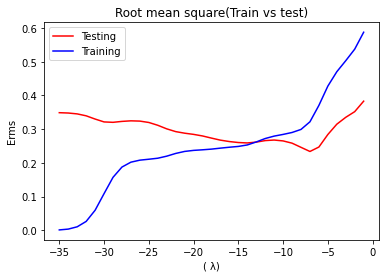

In [290]:
errors_reg = []
for l in reg:  
    errors_reg.append(rms(obs_y,plot_pol(obs_x,coef_dic_regularized[l],m)))

errors_test_reg = []

for l in reg:  
   
    errors_test_reg.append(rms(obs_y_test,plot_pol(obs_x_test,coef_dic_regularized[l],m)))
plt.close("all")    
plt.plot(values,errors_test_reg,'r-',label="Testing") 
plt.plot(values,errors_reg,'b-',label="Training") 
plt.title("Root mean square(Train vs test)")
plt.ylabel("Erms")
plt.xlabel("( λ)")

plt.legend()
plt.show()
